# House Listings - Seattle Airbnb

## In this notebook, I'll attempt to look at the house listings in the Seattle Airbnb data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
pwd

'/Users/sukanto/Google Drive/allprojects/393_43835_bundle_archive'

In [44]:
df = pd.read_csv('clean_listings.csv',index_col=0)
df.head()

,id,last_scraped,name,summary,space,description,neighborhood_overview,transit,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,Maija,2011-08-11,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",Andrea,2013-02-21,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,Jill,2014-06-12,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,Emily,2013-11-06,...,NaN,NaN,NaN,f,f,flexible,f,f,1,1.54
4,278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,Emily,2011-11-29,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [45]:
df.shape

(3818, 80)

In [46]:
df.columns

Index(['id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'transit', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
  

In [47]:
df1 = df[['neighbourhood_group_cleansed','property_type', 
          'room_type', 'accommodates','price', 'weekly_price', 'monthly_price',
         'minimum_nights','maximum_nights','has_availability',
       'availability_30', 'availability_60', 'availability_90', 'availability_365',
         'bathrooms', 'bedrooms', 'beds', 'bed_type', 'accommodates','host_response_rate',
         'review_scores_rating','review_scores_checkin','review_scores_location',
          'review_scores_communication','reviews_per_month']] #getting relevant columns
df1.head()

,neighbourhood_group_cleansed,property_type,room_type,accommodates,price,weekly_price,monthly_price,minimum_nights,maximum_nights,has_availability,...,bedrooms,beds,bed_type,accommodates,host_response_rate,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication,reviews_per_month
0,Queen Anne,Apartment,Entire home/apt,4,$85.00,NaN,NaN,1,365,t,...,1.0,1.0,Real Bed,4,96%,95.0,10.0,9.0,10.0,4.07
1,Queen Anne,Apartment,Entire home/apt,4,$150.00,"$1,000.00","$3,000.00",2,90,t,...,1.0,1.0,Real Bed,4,98%,96.0,10.0,10.0,10.0,1.48
2,Queen Anne,House,Entire home/apt,11,$975.00,NaN,NaN,4,30,t,...,5.0,7.0,Real Bed,11,67%,97.0,10.0,10.0,10.0,1.15
3,Queen Anne,Apartment,Entire home/apt,3,$100.00,$650.00,"$2,300.00",1,1125,t,...,0.0,2.0,Real Bed,3,NaN,NaN,NaN,NaN,NaN,1.54
4,Queen Anne,House,Entire home/apt,6,$450.00,NaN,NaN,1,1125,t,...,3.0,3.0,Real Bed,6,100%,92.0,10.0,9.0,10.0,0.89


In [48]:
df1.shape

(3818, 25)

In [49]:
df1['price'] = df1['price'].str.replace("[$,]", "").astype("float")
df1['weekly_price'] = df1['weekly_price'].str.replace("[$,]", "").astype("float")
df1['monthly_price'] = df1['monthly_price'].str.replace("[$,]", "").astype("float") #fixing strings in price columns
df1.head()

/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,neighbourhood_group_cleansed,property_type,room_type,accommodates,price,weekly_price,monthly_price,minimum_nights,maximum_nights,has_availability,...,bedrooms,beds,bed_type,accommodates,host_response_rate,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication,reviews_per_month
0,Queen Anne,Apartment,Entire home/apt,4,85.0,NaN,NaN,1,365,t,...,1.0,1.0,Real Bed,4,96%,95.0,10.0,9.0,10.0,4.07
1,Queen Anne,Apartment,Entire home/apt,4,150.0,1000.0,3000.0,2,90,t,...,1.0,1.0,Real Bed,4,98%,96.0,10.0,10.0,10.0,1.48
2,Queen Anne,House,Entire home/apt,11,975.0,NaN,NaN,4,30,t,...,5.0,7.0,Real Bed,11,67%,97.0,10.0,10.0,10.0,1.15
3,Queen Anne,Apartment,Entire home/apt,3,100.0,650.0,2300.0,1,1125,t,...,0.0,2.0,Real Bed,3,NaN,NaN,NaN,NaN,NaN,1.54
4,Queen Anne,House,Entire home/apt,6,450.0,NaN,NaN,1,1125,t,...,3.0,3.0,Real Bed,6,100%,92.0,10.0,9.0,10.0,0.89


In [50]:
df2 = df1.loc[df1['property_type'] == 'House',
              ['neighbourhood_group_cleansed','price','weekly_price','monthly_price','bedrooms',
              'availability_30','availability_60','availability_90','availability_365','minimum_nights',
               'accommodates','reviews_per_month','review_scores_rating',
              'review_scores_checkin','review_scores_location',
              'review_scores_communication']]
df2.head()

,neighbourhood_group_cleansed,price,weekly_price,monthly_price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,NaN,NaN,5.0,1,6,17,220,4,11,11,1.15,97.0,10.0,10.0,10.0
4,Queen Anne,450.0,NaN,NaN,3.0,30,60,90,365,1,6,6,0.89,92.0,10.0,9.0,10.0
5,Queen Anne,120.0,800.0,NaN,1.0,0,0,27,302,1,2,2,2.45,95.0,10.0,10.0,10.0
6,Queen Anne,80.0,575.0,NaN,1.0,20,49,71,346,3,2,2,2.46,99.0,10.0,10.0,10.0
10,Queen Anne,95.0,595.0,NaN,1.0,0,0,0,153,3,2,2,3.33,97.0,10.0,10.0,10.0


In [51]:
df2.isnull().any() #missing value check

neighbourhood_group_cleansed    False
price                           False
weekly_price                     True
monthly_price                    True
bedrooms                         True
availability_30                 False
availability_60                 False
availability_90                 False
availability_365                False
minimum_nights                  False
accommodates                    False
accommodates                    False
reviews_per_month               False
review_scores_rating             True
review_scores_checkin            True
review_scores_location           True
review_scores_communication      True
dtype: bool

In [52]:
areas = df2['neighbourhood_group_cleansed'].value_counts() #other neighbourhoods top, again
areas

Other neighborhoods    496
Central Area           216
Capitol Hill           168
Ballard                146
West Seattle           141
Rainier Valley         114
Queen Anne              93
Beacon Hill             76
Delridge                56
Lake City               54
Northgate               45
University District     39
Magnolia                39
Seward Park             35
Cascade                  9
Interbay                 4
Downtown                 2
Name: neighbourhood_group_cleansed, dtype: int64

In [53]:
df2.dropna(subset=['bedrooms'],axis=0) #no point keeping that one listing with zero bedrooms
df2.head()

,neighbourhood_group_cleansed,price,weekly_price,monthly_price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,NaN,NaN,5.0,1,6,17,220,4,11,11,1.15,97.0,10.0,10.0,10.0
4,Queen Anne,450.0,NaN,NaN,3.0,30,60,90,365,1,6,6,0.89,92.0,10.0,9.0,10.0
5,Queen Anne,120.0,800.0,NaN,1.0,0,0,27,302,1,2,2,2.45,95.0,10.0,10.0,10.0
6,Queen Anne,80.0,575.0,NaN,1.0,20,49,71,346,3,2,2,2.46,99.0,10.0,10.0,10.0
10,Queen Anne,95.0,595.0,NaN,1.0,0,0,0,153,3,2,2,3.33,97.0,10.0,10.0,10.0


In [54]:
df2['review_scores_checkin'] = df2['review_scores_checkin'].fillna((df2['review_scores_checkin'].mean()))
df2['review_scores_location'] = df2['review_scores_location'].fillna((df2['review_scores_location'].mean()))
df2['review_scores_communication'] = df2['review_scores_communication'].fillna((df2['review_scores_communication'].mean()))
df2.head() #impute the missing values, if you will

,neighbourhood_group_cleansed,price,weekly_price,monthly_price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,NaN,NaN,5.0,1,6,17,220,4,11,11,1.15,97.0,10.0,10.0,10.0
4,Queen Anne,450.0,NaN,NaN,3.0,30,60,90,365,1,6,6,0.89,92.0,10.0,9.0,10.0
5,Queen Anne,120.0,800.0,NaN,1.0,0,0,27,302,1,2,2,2.45,95.0,10.0,10.0,10.0
6,Queen Anne,80.0,575.0,NaN,1.0,20,49,71,346,3,2,2,2.46,99.0,10.0,10.0,10.0
10,Queen Anne,95.0,595.0,NaN,1.0,0,0,0,153,3,2,2,3.33,97.0,10.0,10.0,10.0


In [55]:
df2.drop(['monthly_price','weekly_price'],axis=1,inplace=True)
df2.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,5.0,1,6,17,220,4,11,11,1.15,97.0,10.0,10.0,10.0
4,Queen Anne,450.0,3.0,30,60,90,365,1,6,6,0.89,92.0,10.0,9.0,10.0
5,Queen Anne,120.0,1.0,0,0,27,302,1,2,2,2.45,95.0,10.0,10.0,10.0
6,Queen Anne,80.0,1.0,20,49,71,346,3,2,2,2.46,99.0,10.0,10.0,10.0
10,Queen Anne,95.0,1.0,0,0,0,153,3,2,2,3.33,97.0,10.0,10.0,10.0


In [56]:
df2.describe() #what are the summary stats for house listings like?

,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
count,1733.000000,1732.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1460.000000,1733.000000,1733.000000,1733.000000
mean,132.351414,1.609122,17.022504,37.439123,59.121754,251.956722,2.186959,3.643970,3.643970,1.928863,94.833562,9.813618,9.531593,9.819616
std,106.877963,1.028304,12.289759,23.459449,34.131160,125.751863,2.402778,2.407087,2.407087,1.628366,6.014864,0.525609,0.605282,0.486278
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.020000,40.000000,2.000000,6.000000,2.000000
25%,65.000000,1.000000,2.000000,14.000000,31.000000,143.000000,1.000000,2.000000,2.000000,0.780000,93.000000,9.813618,9.000000,9.819616
50%,95.000000,1.000000,21.000000,48.000000,76.000000,324.000000,2.000000,3.000000,3.000000,1.540000,96.000000,10.000000,10.000000,10.000000
75%,165.000000,2.000000,30.000000,60.000000,89.000000,361.000000,2.000000,5.000000,5.000000,2.550000,99.000000,10.000000,10.000000,10.000000
max,1000.000000,7.000000,30.000000,60.000000,90.000000,365.000000,31.000000,16.000000,16.000000,10.950000,100.000000,10.000000,10.000000,10.000000


In [57]:
df2['price'].median() #median house prices seem to be lower than apartments

95.0

In [58]:
df3 = df2[df2['minimum_nights'] >= 2] #looking at listings which require stay of least two nights or more
df3.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,5.0,1,6,17,220,4,11,11,1.15,97.0,10.0,10.0,10.0
6,Queen Anne,80.0,1.0,20,49,71,346,3,2,2,2.46,99.0,10.0,10.0,10.0
10,Queen Anne,95.0,1.0,0,0,0,153,3,2,2,3.33,97.0,10.0,10.0,10.0
11,Queen Anne,99.0,1.0,21,21,21,229,3,2,2,0.98,97.0,9.0,10.0,10.0
13,Queen Anne,165.0,2.0,13,40,63,337,2,5,5,3.00,100.0,9.0,10.0,9.0


In [59]:
df3 = df3.loc[:,~df3.columns.duplicated()] #oops, the accommodation column got duplicated at some stage
df3

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,5.0,1,6,17,220,4,11,1.15,97.0,10.000000,10.000000,10.000000
6,Queen Anne,80.0,1.0,20,49,71,346,3,2,2.46,99.0,10.000000,10.000000,10.000000
10,Queen Anne,95.0,1.0,0,0,0,153,3,2,3.33,97.0,10.000000,10.000000,10.000000
11,Queen Anne,99.0,1.0,21,21,21,229,3,2,0.98,97.0,9.000000,10.000000,10.000000
13,Queen Anne,165.0,2.0,13,40,63,337,2,5,3.00,100.0,9.000000,10.000000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,Other neighborhoods,77.0,1.0,19,42,72,338,2,2,5.95,98.0,10.000000,10.000000,10.000000
3802,Other neighborhoods,200.0,2.0,0,0,0,247,2,4,1.54,NaN,9.813618,9.531593,9.819616
3808,Other neighborhoods,175.0,3.0,19,19,19,294,3,6,1.15,96.0,10.000000,10.000000,10.000000
3810,Other neighborhoods,154.0,2.0,13,43,73,227,2,5,1.56,92.0,10.000000,10.000000,10.000000


In [60]:
df3_a = df3[df3['accommodates'] >= 4] #time to look at apartments accommodating at least 4 people or more
df3_a.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,5.0,1,6,17,220,4,11,1.15,97.0,10.0,10.0,10.0
13,Queen Anne,165.0,2.0,13,40,63,337,2,5,3.00,100.0,9.0,10.0,9.0
14,Queen Anne,461.0,6.0,19,40,65,327,3,16,2.65,98.0,10.0,10.0,10.0
15,Queen Anne,109.0,2.0,30,60,69,69,3,5,0.73,80.0,8.0,8.0,8.0
19,Queen Anne,700.0,5.0,24,54,84,359,3,10,0.82,85.0,9.0,8.0,9.0


In [61]:
df3_a.to_csv('houses_four.csv')

In [62]:
df3_b = df3_a[df3_a['bedrooms'] >= 2] #obviously, more people will need more bedrooms
df3_b.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,5.0,1,6,17,220,4,11,1.15,97.0,10.0,10.0,10.0
13,Queen Anne,165.0,2.0,13,40,63,337,2,5,3.00,100.0,9.0,10.0,9.0
14,Queen Anne,461.0,6.0,19,40,65,327,3,16,2.65,98.0,10.0,10.0,10.0
15,Queen Anne,109.0,2.0,30,60,69,69,3,5,0.73,80.0,8.0,8.0,8.0
19,Queen Anne,700.0,5.0,24,54,84,359,3,10,0.82,85.0,9.0,8.0,9.0


In [63]:
df3_b.shape

(455, 14)

In [64]:
df3_b[['review_scores_checkin','review_scores_location','review_scores_communication']].median()

review_scores_checkin          10.0
review_scores_location         10.0
review_scores_communication    10.0
dtype: float64

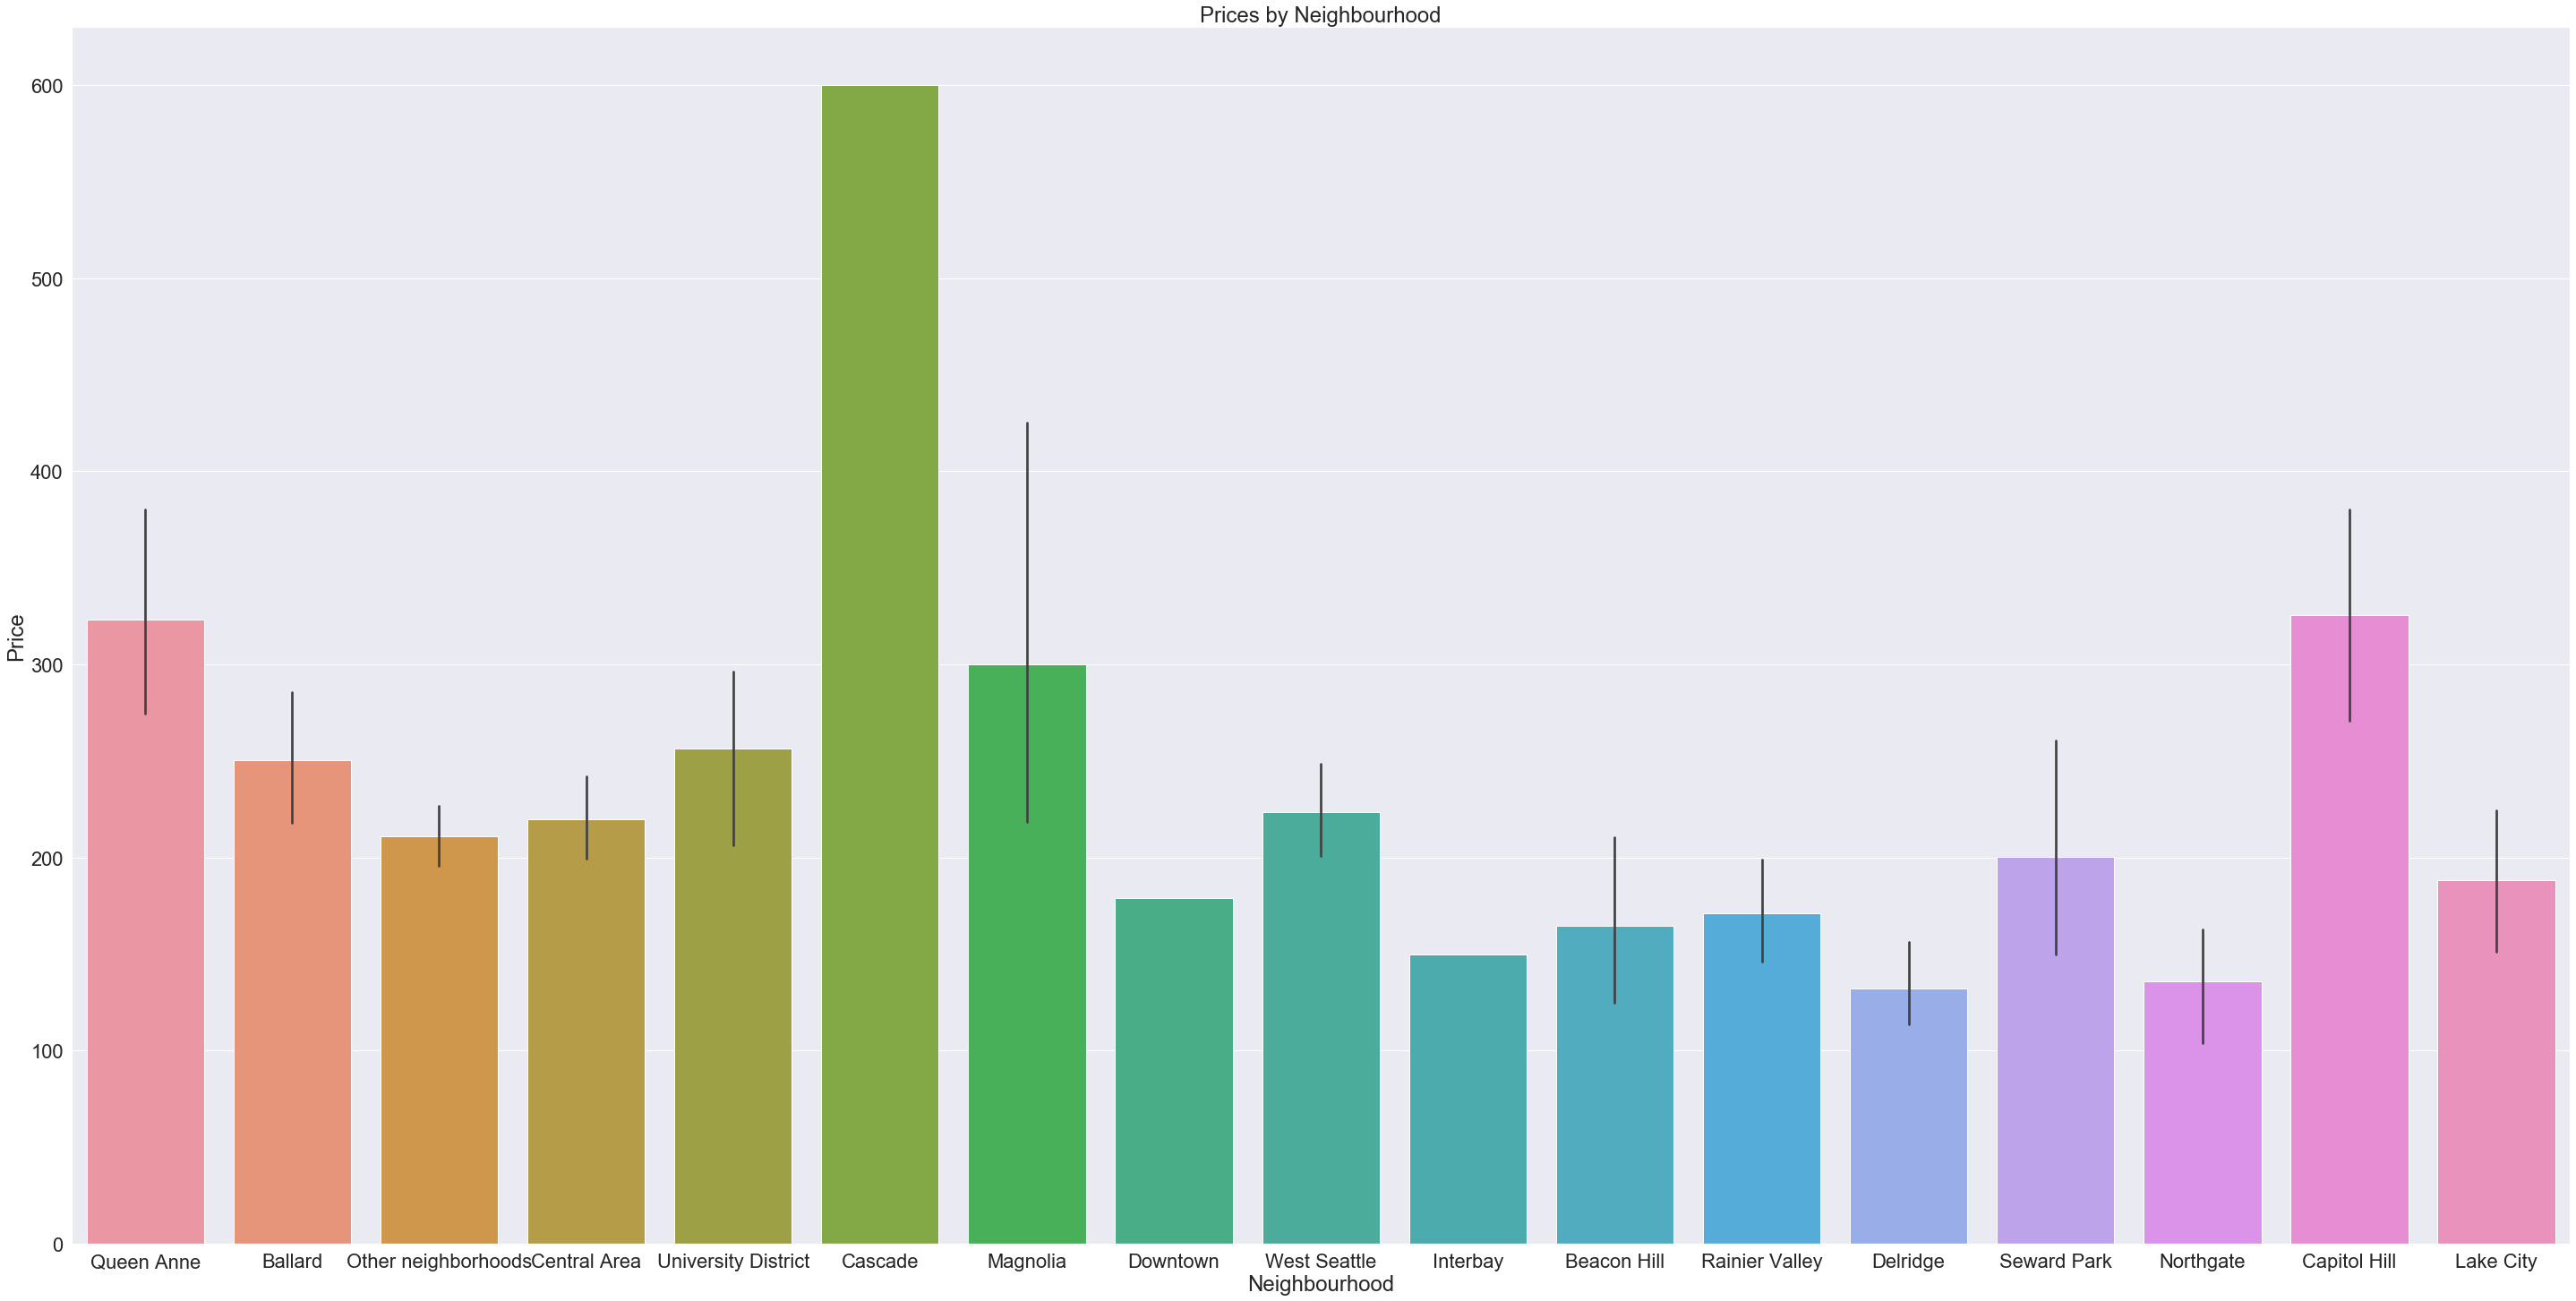

In [65]:
plt.figure(figsize=(50,25))
sns.set(font_scale=2)
sns.barplot(df3_b['neighbourhood_group_cleansed'], df3_b['price'])
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Prices by Neighbourhood') #Cascade prices top
plt.savefig('house_price.jpg');

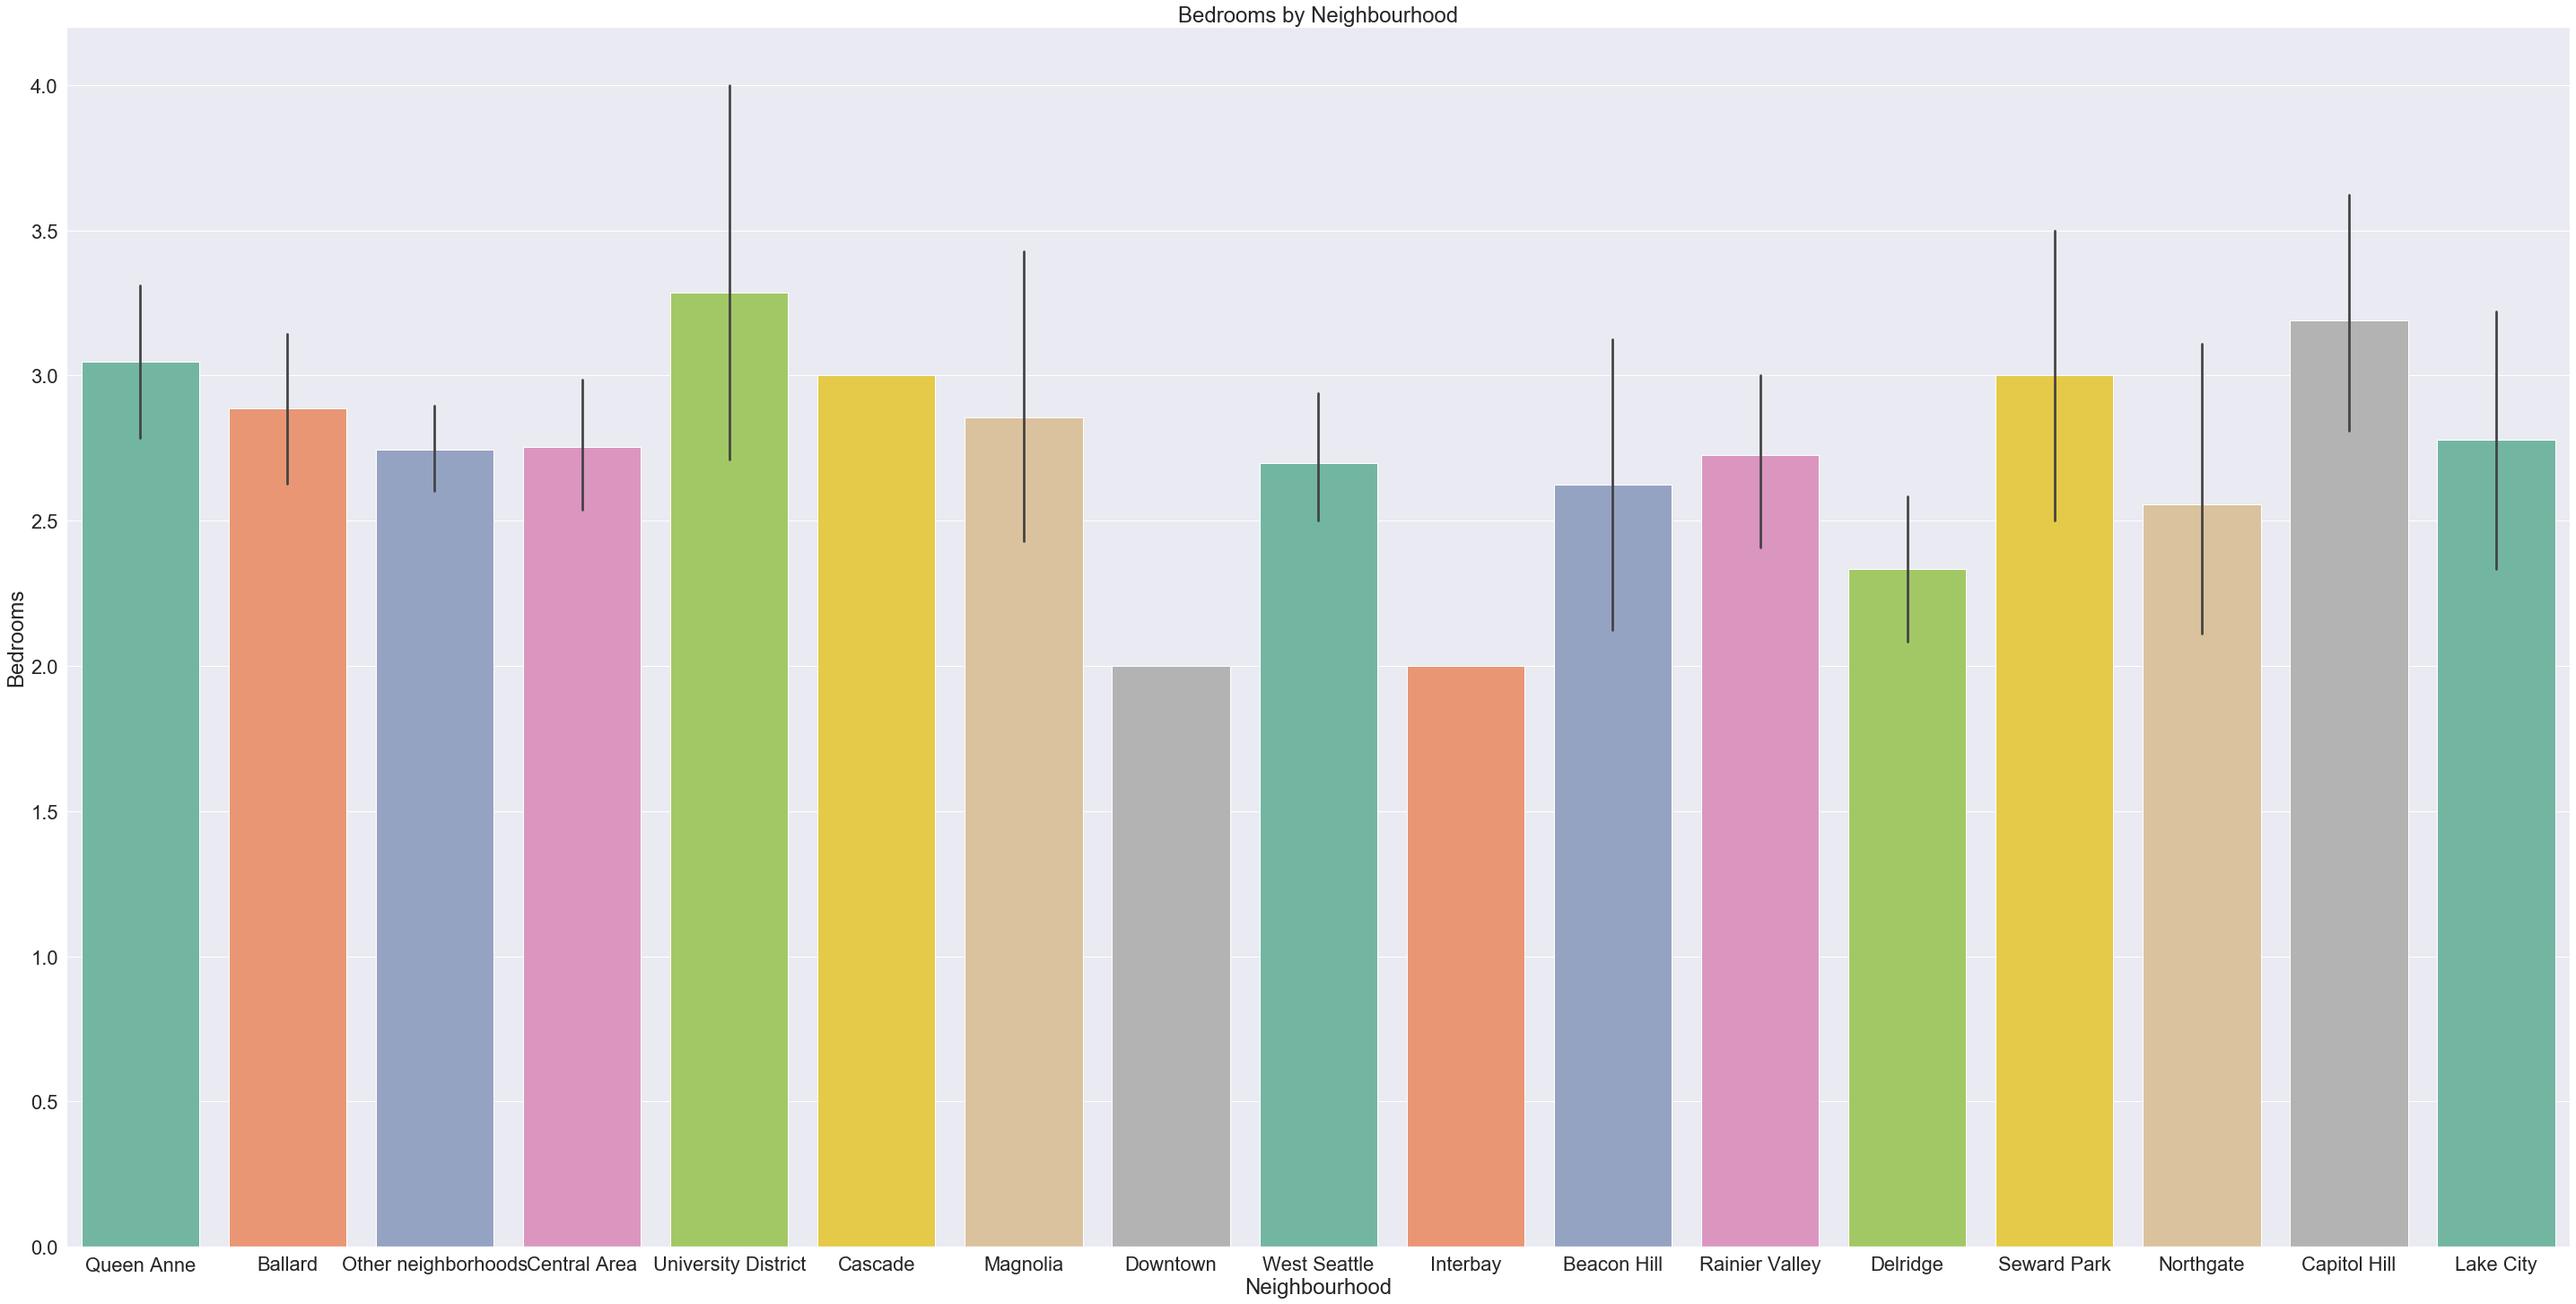

In [66]:
plt.figure(figsize=(50,25))
sns.set(font_scale=2)
sns.barplot(df3_b['neighbourhood_group_cleansed'], df3_b['bedrooms'],palette='Set2')
plt.xlabel('Neighbourhood')
plt.ylabel('Bedrooms')
plt.title('Bedrooms by Neighbourhood')
plt.savefig('house_bed.jpg') #University District has most bedrooms available per listing

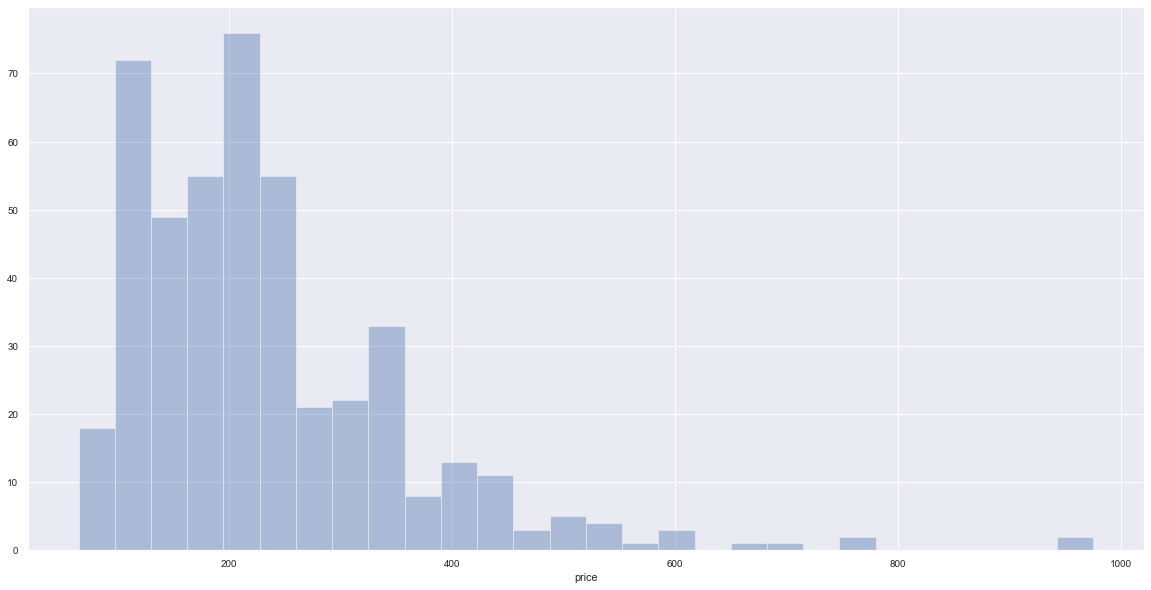

In [67]:
plt.figure(figsize=(20,10))
sns.set(font_scale=0.9)
sns.distplot(df3_b['price'],kde=False)
plt.savefig('house_price_hist.jpg'); #overall price distribution is centred around USD 200 for houses

In [68]:
df4 = df3_b.groupby(['neighbourhood_group_cleansed','price']).sum().reset_index() #lets take a closer look at neighbourhoods now
df4

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
0,Ballard,100.0,2.0,0,0,0,186,14,4,0.07,100.0,10.000000,10.000000,10.000000
1,Ballard,110.0,4.0,29,62,122,670,16,8,1.40,171.0,19.000000,19.000000,19.000000
2,Ballard,133.0,2.0,30,60,90,365,2,8,2.87,95.0,9.000000,10.000000,10.000000
3,Ballard,145.0,2.0,29,59,88,88,2,4,1.44,97.0,10.000000,10.000000,10.000000
4,Ballard,150.0,5.0,0,10,11,239,8,10,1.36,184.0,20.000000,20.000000,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Seattle,300.0,3.0,26,56,78,353,5,5,0.82,100.0,10.000000,10.000000,10.000000
285,West Seattle,325.0,5.0,27,57,84,315,3,11,1.54,0.0,9.813618,9.531593,9.819616
286,West Seattle,350.0,13.0,78,168,253,825,12,27,4.24,180.0,39.627235,38.063187,39.639232
287,West Seattle,450.0,3.0,27,57,87,362,3,7,1.54,0.0,9.813618,9.531593,9.819616


In [69]:
df4['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    63
Central Area           39
West Seattle           32
Capitol Hill           29
Queen Anne             28
Ballard                24
Rainier Valley         16
Delridge               10
Magnolia               10
Beacon Hill             8
Northgate               8
Lake City               7
Seward Park             7
University District     5
Cascade                 1
Interbay                1
Downtown                1
Name: neighbourhood_group_cleansed, dtype: int64

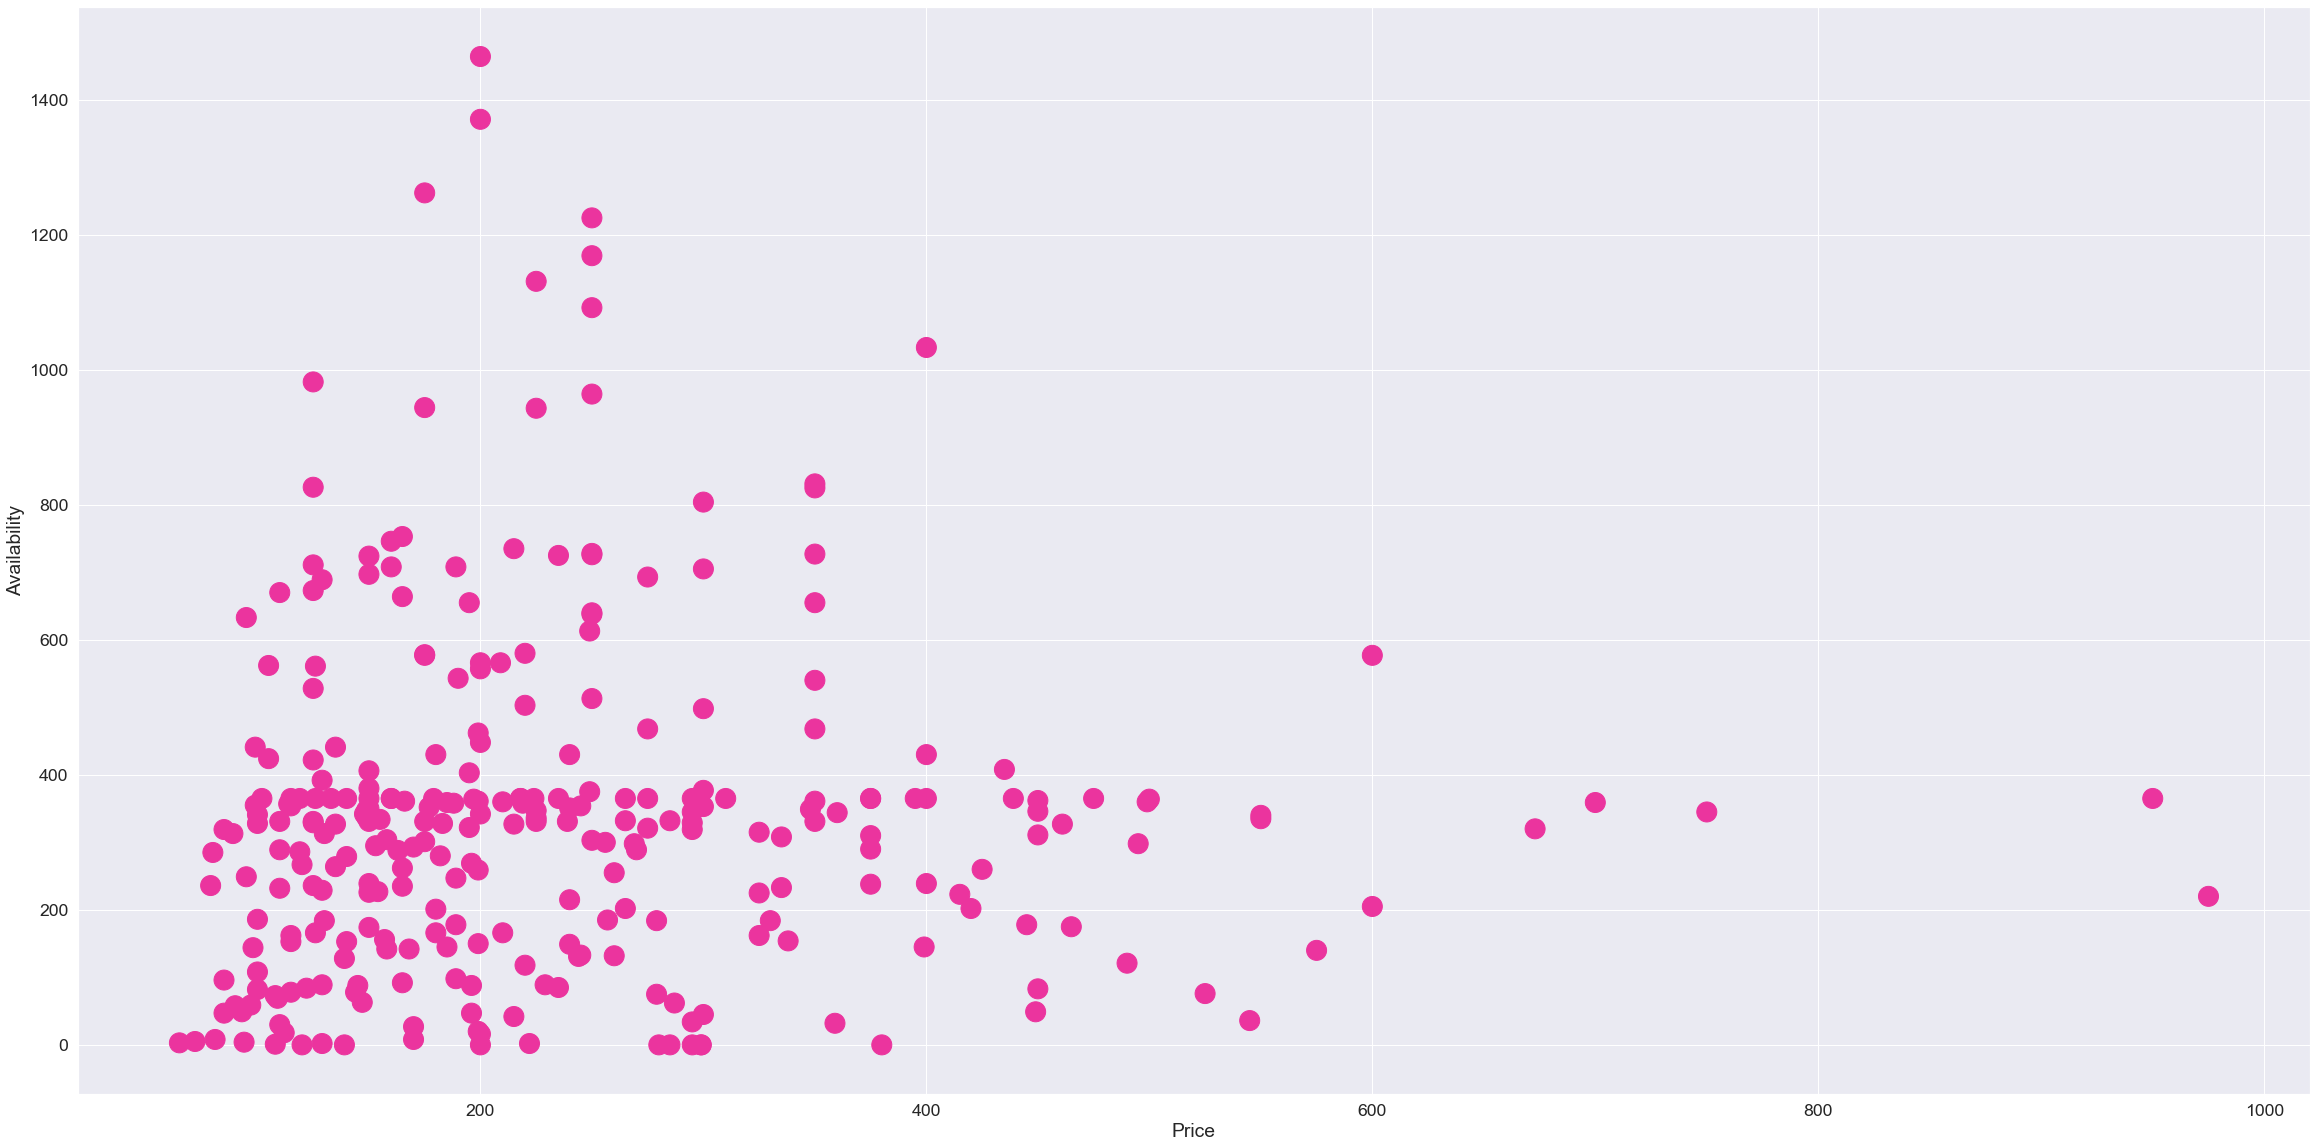

In [70]:
plt.figure(figsize=(40,20))
sns.set(font_scale=1.6)
plt.scatter(df4['price'],df4['availability_365'], sizes=(400,400),color='#eb349e')
plt.xlabel('Price')
plt.ylabel('Availability')
plt.savefig('house_avail.jpg'); #good availability in within the USD 400 range, for Houses

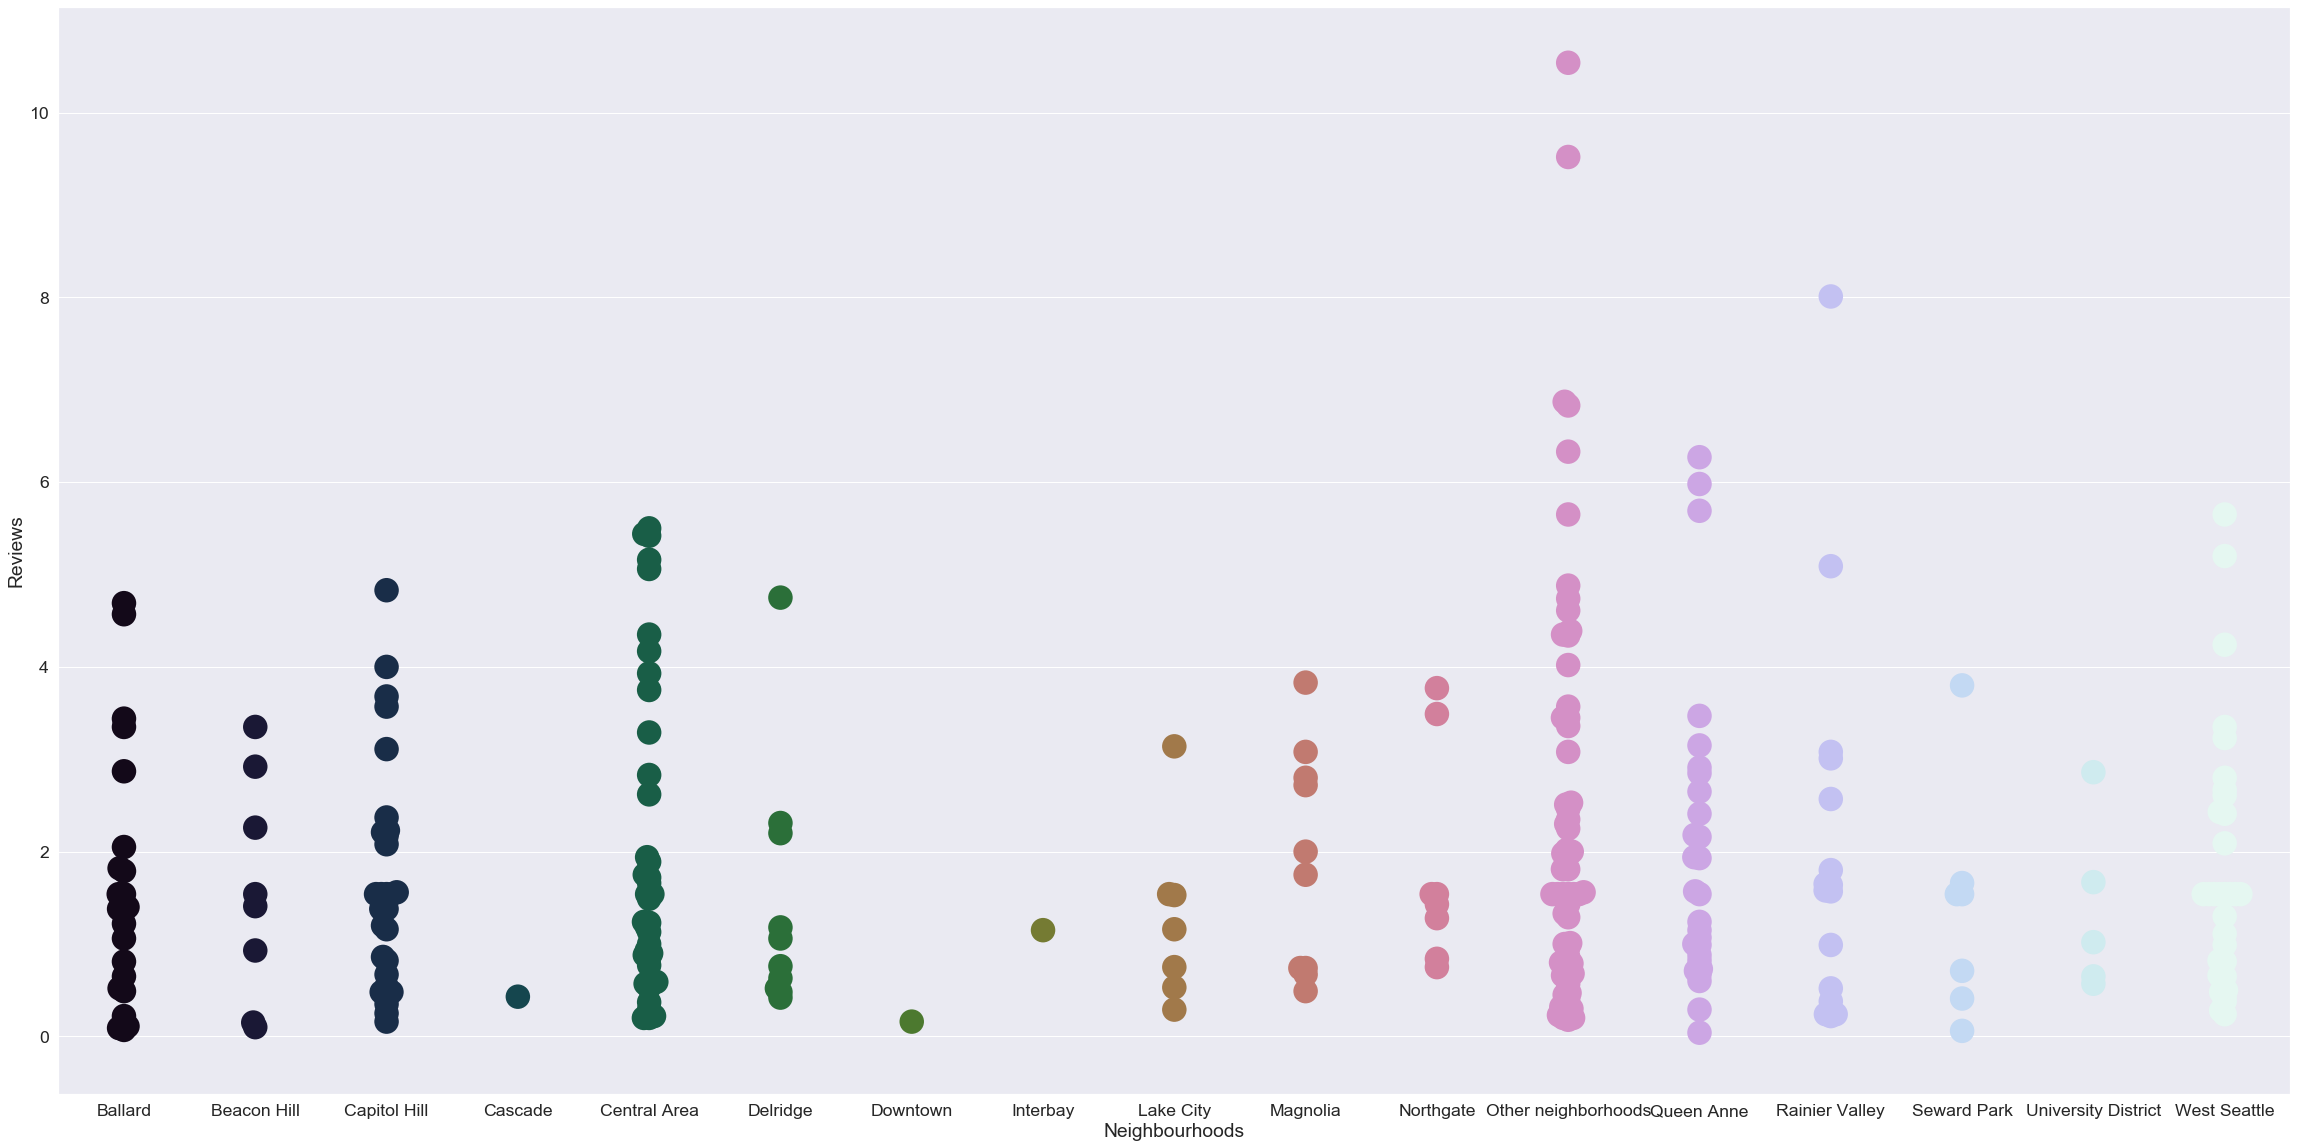

In [90]:
plt.figure(figsize=(40,20))
sns.set(font_scale=1.6)
sns.swarmplot(df4['neighbourhood_group_cleansed'],df4['reviews_per_month'],
              sizes=(600,600),palette='cubehelix')
plt.xlabel('Neighbourhoods')
plt.ylabel('Reviews')
plt.savefig('house_hood_reviews.jpg'); #so Other Neighbourhood get more reviews as well

In [72]:
df4.columns

Index(['neighbourhood_group_cleansed', 'price', 'bedrooms', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'minimum_nights', 'accommodates', 'reviews_per_month',
       'review_scores_rating', 'review_scores_checkin',
       'review_scores_location', 'review_scores_communication'],
      dtype='object')

In [73]:
df5 = df3[['price', 'bedrooms', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'minimum_nights', 'accommodates', 'reviews_per_month']]
df5.head()

,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month
2,975.0,5.0,1,6,17,220,4,11,1.15
6,80.0,1.0,20,49,71,346,3,2,2.46
10,95.0,1.0,0,0,0,153,3,2,3.33
11,99.0,1.0,21,21,21,229,3,2,0.98
13,165.0,2.0,13,40,63,337,2,5,3.00


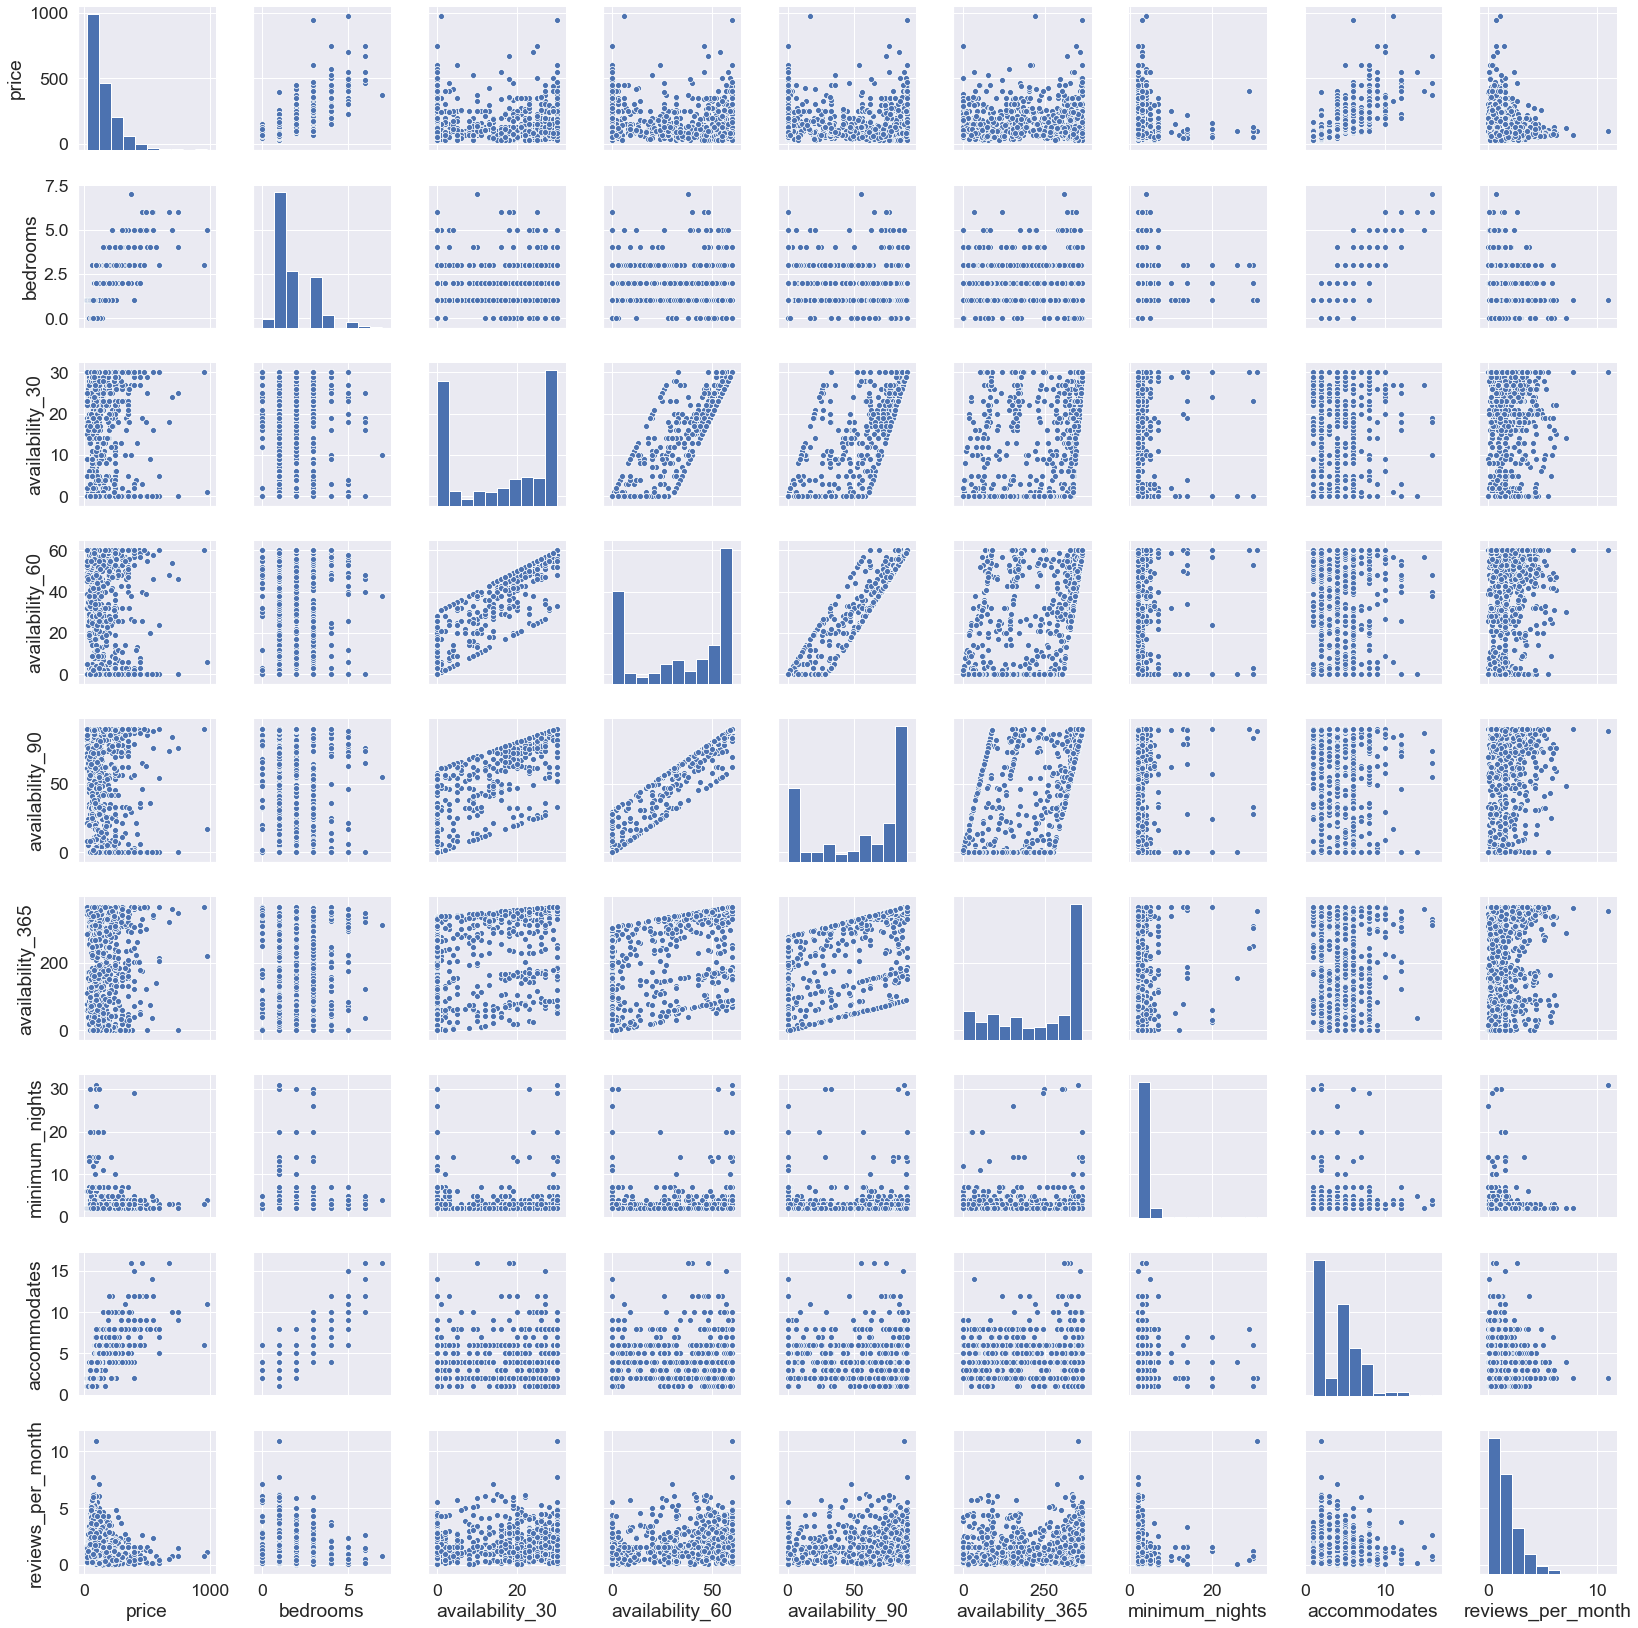

In [77]:
sns.pairplot(df5,palette='husl');

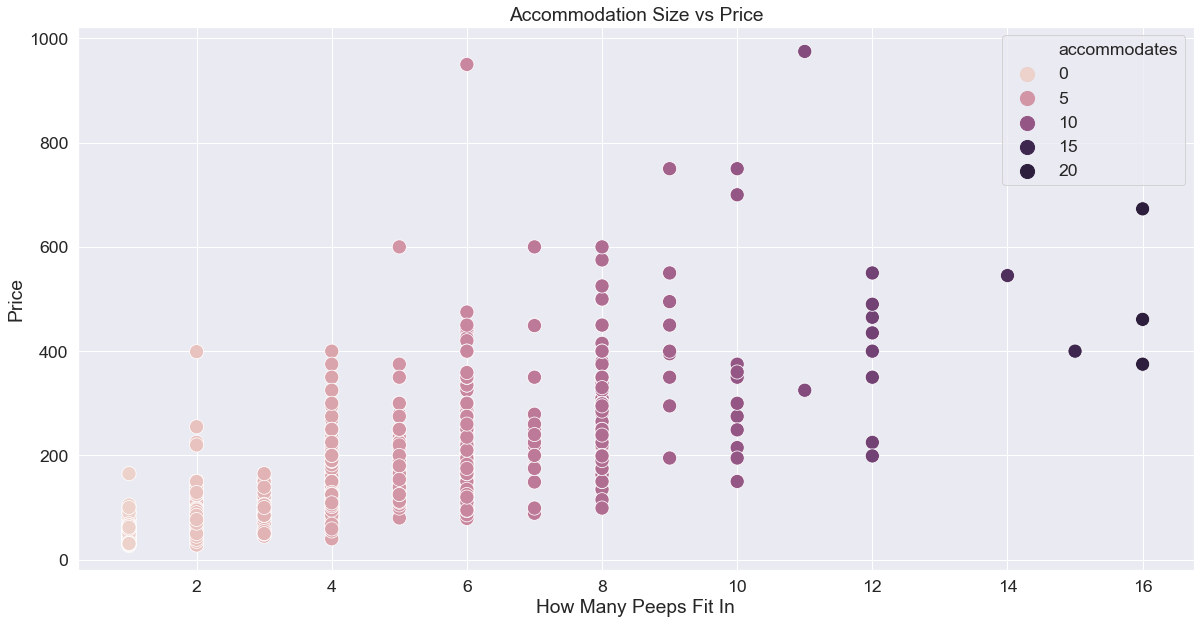

In [91]:
plt.figure(figsize=(20,10))
sns.scatterplot(df5['accommodates'],df5['price'],
               hue=df5['accommodates'],size=df5['accommodates'],
               sizes=(200,200))
plt.xlabel('How Many Peeps Fit In')
plt.ylabel('Price')
plt.title('Accommodation Size vs Price')
plt.savefig('acco_price.jpg'); #the USD 200-800 listings seem to fit in 8 people, not bad

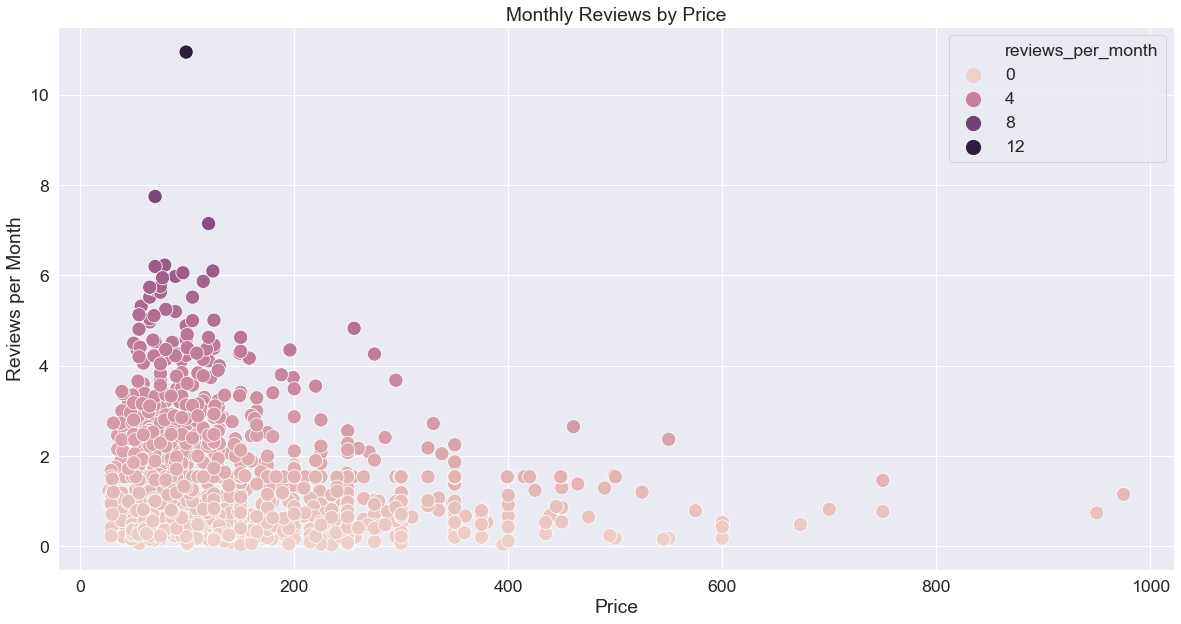

In [96]:
plt.figure(figsize=(20,10))
sns.scatterplot(df5['price'],df5['reviews_per_month'],
               hue=df5['reviews_per_month'],size=df5['reviews_per_month'],
               sizes=(200,200))
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.title('Monthly Reviews by Price')
plt.savefig('price_review.jpg'); #at least 4 reviews per month for the USD 200 listings

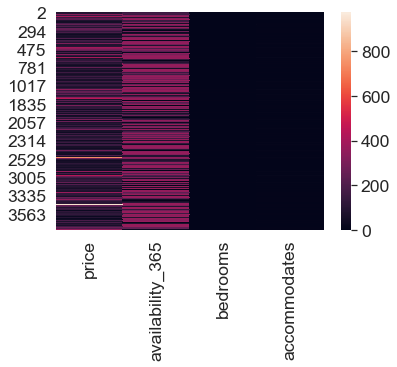

In [88]:
sns.heatmap(df5[['price','availability_365',
                 'bedrooms','accommodates']]);